In [1]:
%matplotlib inline
from modules.constants import *
import matplotlib.pyplot as plt

# Hydrogen-like atom
Ref: https://en.wikipedia.org/wiki/Hydrogen-like_atom

$$
\psi_{nlm} (\mathbf{r}) = R_{nl}(r) Y_{lm} (\theta, \phi) \\
R_{nl}(r) = -\sqrt{\left(\frac{2Z}{na_B}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}}e^{-Zr/na_B} \left(\frac{2Z r}{na_B} \right)^lL_{n-l-1}^{(2l+1)}\left(\frac{2Z r}{n a_B}\right) 
$$
where $a_\mu$ in the ref. is replaced by the Borh radius $a_B$ within an assumption that nucleus mass is much larger than electron mass.

## The spherical harmonics, Y_{lm} for small (l,m)
Ref2: https://en.wikipedia.org/wiki/Spherical_harmonics
$$
Y_{00} = \frac{1}{2} \sqrt{\frac{1}{\pi}} \\
Y_{1-1} = \frac{1}{2} \sqrt{\frac{3}{2\pi}}\sin \theta e^{-i \varphi} \\
Y_{10} = \frac{1}{2} \sqrt{\frac{3}{\pi}} \cos \theta \\
Y_{111} = \frac{-1}{2} \sqrt{\frac{3}{2\pi}}\sin \theta e^{+i \varphi}
$$

## The generalized Laguerre polynomials, L_{n-l-1}^{(2l+1)} for small (n,l)
Ref3: https://en.wikipedia.org/wiki/Laguerre_polynomials#Generalized_Laguerre_polynomials

$$
L_0^{(\alpha)}(x) = 1 \\
L_1^{(\alpha)}(x) = -x + (\alpha + 1) \\
L_2^{(\alpha)}(x) = \frac{x^2}{2}-(\alpha + 2) x + \frac{(\alpha + 1)(\alpha + 2)}{2} \\
$$




## 1s (n=1, l=0, m=0)

$$
\psi_{100} (\mathbf{r})
=
-\sqrt{\left(\frac{2Z}{a_B}\right)^3 \frac{1}{2}} e^{-Zr/a_B} \frac{1}{2} \sqrt{\frac{1}{\pi}}
=
-\sqrt{\frac{Z^3}{\pi}} e^{-Zr}
$$

## 2s (n=2, l=0, m=0)

$$
\psi_{200} (\mathbf{r})
=
$$

## 2pz (n=2, l=1, m=0)

$$
\psi_{210} (\mathbf{r})
=
-\sqrt{\left(\frac{2Z}{2a_B} \right)^3 \frac{1}{2\times2\times3!}} e^{-Zr/2a_B} \left(\frac{Zr}{a_B} \right) \frac{1}{2} \sqrt{\frac{3}{\pi}} \cos \theta
=
-\sqrt{\frac{Z^3}{2^5 \pi}} e^{-Zr/2} Zr  \cos \theta
$$

# 2pz atomic orbital
$$
\phi_{2p_z}(r) \propto Zr \cos \theta \exp\left(- \frac{Z}{2}r \right)
$$

In [2]:
# Get 2pz orbital for spatial cordinate `r`
def get_2pz(r, Rc, Z, epsilon = 1.0e-8):
    #Rc is a three-dimensional vector to specify atomic position in real-space
    #Z is effective nuclear charge, non-integral number is allowed
    #epsilon is just introduced to avoid zero-division
    rad = np.sqrt((r[:,0] - Rc[0])**2+(r[:,1] - Rc[1])**2+(r[:,2] - Rc[2])**2 + epsilon**2)
    costheta = (r[:,2] - Rc[2])/rad[:]
    phi = Z*rad*costheta*np.exp(-0.5*Z*rad)*np.sqrt(Z**3/2.0**5/pi)
    return phi
# Get 1s orbital for spatial cordinate `r`
def get_1s(r, Rc, Z, epsilon = 1.0e-8):
    #Rc is a three-dimensional vector to specify atomic position in real-space
    #Z is effective nuclear charge, non-integral number is allowed
    #epsilon is just introduced to avoid zero-division
    rad = np.sqrt((r[:,0] - Rc[0])**2+(r[:,1] - Rc[1])**2+(r[:,2] - Rc[2])**2 + epsilon**2)
    costheta = (r[:,2] - Rc[2])/rad[:]
    phi = np.exp(-Z*rad)*np.sqrt(Z**3/pi)
    return phi
# Generate spatial cordinate 
def get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz):
    # Lx, Ly, Lz are sizes of spatial box along x,y, and z axes.
    # `r` is generated in a box [(-Lx/2, Lx/2), (-Ly/2, Ly/2), (-Lz/2, Lz/2)], namely the center of box is placed in the origin (0,0,0)
    # Nx, Ny, Nz are number of spatial uniform grid along x,y, and z zxes
    dx = Lx/Nx #x-grid size
    dy = Ly/Ny #y-grid size
    dz = Lz/Nz #z-grid size
    dV = dx*dy*dz #Volume of the discretized box
    V = Lx*Ly*Lz #Volume
    r = np.zeros([Nx*Ny*Nz,3],dtype = "float64")
    n = 0
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                r[n, 0] = -Lx/2.0 + ix*dx
                r[n, 1] = -Ly/2.0 + iy*dy
                r[n, 2] = -Lz/2.0 + iz*dz
                n += 1
    return r, dV, V

In [3]:
# Check of nomarlization or 1s, and 2pz orbitals
## Generate spatial grids
Lx = 8
Ly = 8
Lz = 8
Nx = 80
Ny = 80
Nz = 80
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
## Determine atomic position and the effective charge
Rc = np.array([0.2, 0.2, 0.2])
print(Rc)
Z = 4.0
## 1s
phi = get_1s(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 1s orbital', np.sum(phi*phi)*dV)
## 2pz
phi = get_2pz(r, Rc, Z)
print('max, min = ', np.amax(np.abs(phi)), np.amin(np.abs(phi)))
print('The norm of 2pz orbital', np.sum(phi*phi)*dV)


[0.2 0.2 0.2]
max, min =  4.513516487841387 1.0404404649956217e-12
The norm of 1s orbital 1.0042746603682833
max, min =  0.5870506526949596 3.684226416218415e-21
The norm of 2pz orbital 0.9998860843090343


In [4]:
# Test code for overlap integral \int d^3r phi_A (r) phi_B(r)
##
Z = 4.0
##
Lx = 12 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 8
Lz = 8
Nx = 120 
Ny = 80
Nz = 80
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d = 0.0 # Seperation of the two atomic orbitals
RcA = np.array([d/2.0, 0.0, 0.0])
RcB = np.array([-d/2.0, 0.0, 0.0])
phiA = get_2pz(r, RcA, Z)
print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
phiB = get_2pz(r, RcB, Z)
print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

print('The ovelap integral', np.sum(phiA*phiB)*dV)

max, min =  0.5870506526949595 0.0
max, min =  0.5870506526949595 0.0
The ovelap integral 0.9999200005059149


The seperation: d = 0.0
norm, ovlp 0.9999967766723578 0.9999967766723578
The seperation: d = 0.4
norm, ovlp 0.9999967766723578 0.9391545494680033
The seperation: d = 0.8
norm, ovlp 0.9999967766723556 0.7868015461693668
The seperation: d = 1.2
norm, ovlp 0.9999967766723533 0.6010584592438053
The seperation: d = 1.6
norm, ovlp 0.9999967766723474 0.4272074703492132
The seperation: d = 2.0
norm, ovlp 0.9999967766723339 0.28694310298179787
The seperation: d = 2.4
norm, ovlp 0.9999967766723046 0.18425252321588656
The seperation: d = 2.6
norm, ovlp 0.9999967766722798 0.1455798956830043
The seperation: d = 2.683943361398497
norm, ovlp 0.9999966642751176 0.13154601254519507
The seperation: d = 2.7
norm, ovlp 0.9999966568270785 0.128999339894677
The seperation: d = 2.8
norm, ovlp 0.9999967766722438 0.11408413267656659
The seperation: d = 3.2
norm, ovlp 0.9999967766721132 0.06855517346803121
The seperation: d = 3.6
norm, ovlp 0.9999967766718348 0.04017975451283477
The seperation: d = 4.0
norm, ov

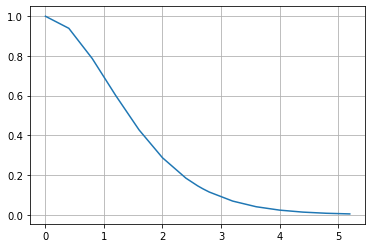

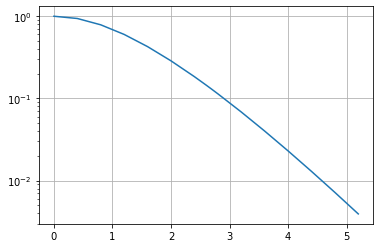

In [5]:
# Overlap integral as a function of the seperation for 2pz
##
Z = 4.00
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for d in d_list:
    print('The seperation: d =', d)
    RcA = np.array([d/2.0, 0.0, 0.0])
    RcB = np.array([-d/2.0, 0.0, 0.0])
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()
#
plt.figure()
plt.yscale('log')
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()

The seperation: d = 0.0
norm, ovlp 0.9999969807547969 0.9999969807547969
The seperation: d = 0.4
norm, ovlp 0.9999969807547968 0.9385746149513015
The seperation: d = 0.8
norm, ovlp 0.9999969807547949 0.7850152945155505
The seperation: d = 1.2
norm, ovlp 0.999996980754793 0.598280362908228
The seperation: d = 1.6
norm, ovlp 0.9999969807547877 0.42403683542308196
The seperation: d = 2.0
norm, ovlp 0.999996980754777 0.2839270367387592
The seperation: d = 2.4
norm, ovlp 0.9999969807547519 0.18171136501296697
The seperation: d = 2.6
norm, ovlp 0.9999969807547303 0.14332580216424876
The seperation: d = 2.683943361398497
norm, ovlp 0.9999968649627153 0.1294147249071562
The seperation: d = 2.7
norm, ovlp 0.9999968572897168 0.1268915243691929
The seperation: d = 2.8
norm, ovlp 0.9999969807546998 0.11212166001228241
The seperation: d = 3.2
norm, ovlp 0.9999969807545883 0.06713597217313498
The seperation: d = 3.6
norm, ovlp 0.9999969807543485 0.039204850092302956
The seperation: d = 4.0
norm, ovl

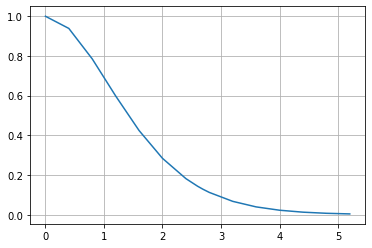

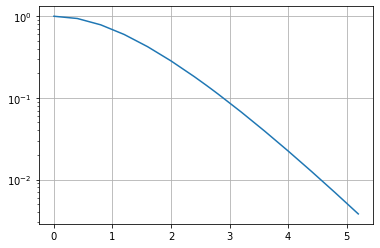

In [6]:
# Overlap integral as a function of the seperation for 2pz
##
Z = 4.02
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for d in d_list:
    print('The seperation: d =', d)
    RcA = np.array([d/2.0, 0.0, 0.0])
    RcB = np.array([-d/2.0, 0.0, 0.0])
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()
#
plt.figure()
plt.yscale('log')
plt.plot(np.array(d_list),np.array(ovlp_list))
plt.grid()
plt.show()

The effective charge: Z= 4.0
norm, ovlp 0.9999966642751176 0.13154601254519507
The effective charge: Z= 4.005
norm, ovlp 0.9999967162734822 0.13101035723034776
The effective charge: Z= 4.01
norm, ovlp 0.9999967670375947 0.13047659410551443
The effective charge: Z= 4.015
norm, ovlp 0.9999968165924984 0.12994471829090395
The effective charge: Z= 4.02
norm, ovlp 0.9999968649627153 0.1294147249071562
The effective charge: Z= 4.025
norm, ovlp 0.9999969121722561 0.12888660907545002
The effective charge: Z= 4.03
norm, ovlp 0.9999969582446289 0.1283603659176088


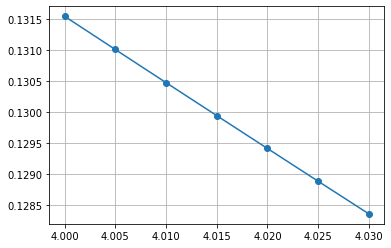

In [7]:
# Overlap integral as a function of the effective charge
##
Lx = 20 #Larger box along x-axis for shiting atomic positions along x-axis
Ly = 10
Lz = 10
Nx = 200 
Ny = 100
Nz = 100
r, dV, V = get_rgrid(Nx, Ny, Nz, Lx, Ly, Lz)
##
d = 2.683943361398497 #0.142 nm
RcA = np.array([d/2.0, 0.0, 0.0])
RcB = np.array([-d/2.0, 0.0, 0.0])
##
Z_list = [4.000, 4.005, 4.010, 4.015, 4.020, 4.025, 4.030]
d_list = [0.0,  0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.60, 2.683943361398497, 2.70, 2.8, 3.2, 3.6, 4.0, 4.4, 4.8, 5.2]
ovlp_list = []
for Z in Z_list:
    print('The effective charge: Z=', Z)
    phiA = get_2pz(r, RcA, Z)
    #print('max, min = ', np.amax(np.abs(phiA)), np.amin(np.abs(phiA)))
    phiB = get_2pz(r, RcB, Z)
    #print('max, min = ', np.amax(np.abs(phiB)), np.amin(np.abs(phiB)))

    print('norm, ovlp', np.sum(phiA*phiA)*dV, np.sum(phiA*phiB)*dV)
    ovlp_list.append(np.sum(phiA*phiB)*dV)
plt.figure()
plt.plot(np.array(Z_list),np.array(ovlp_list),'o-')
plt.grid()
plt.show()

# Grpahene lattice structure
The lattice vector $\mathbf{a}_1, \mathbf{a}_2$ are given as 
$$
\mathbf{a}_1 = a\left(\frac{\sqrt{3}}{2}\hat{x} + \frac{1}{2}\hat{y}\right), \\
\mathbf{a}_2 = a\left(\frac{\sqrt{3}}{2}\hat{x} - \frac{1}{2}\hat{y}\right)
$$

The distance of two Carbon atoms are given by $d = \frac{\sqrt{3}}{3}a$.

Thus, $d=$ 0.142 nm for $a=$ 0.246 nm, 2.684 Bohr, and 4.6485 Bohr respectively.


In [8]:
print(0.246/Bohr2nm)
print(0.246*np.sqrt(3.0)/3.0/Bohr2nm)


4.648726266579395
2.683943361398497
